## CNN model

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import  img_to_array

import numpy as np

# Image manipulations and arranging data
import os
from PIL import Image
# import theano
# theano.config.optimizer="None"
#Sklearn to modify the data

from sklearn.model_selection import train_test_split
# os.chdir("provide path")

# input image dimensions
m,n = 240,240

path1='test\\'
path2='train\\'

classes=os.listdir(path2)
x=[]
y=[]
count = 0
for fol in classes:
    print (fol)
    imgfiles=os.listdir(path2 + '\\' + fol)
    for img in imgfiles:
        try:
            im=Image.open(path2+'\\'+fol+'\\'+img)
            im=im.convert(mode='RGB')
            imrs=im.resize((m,n))
            imrs=img_to_array(imrs)/255
            imrs=imrs.transpose(2,0,1)
            imrs=imrs.reshape(3,m,n)
            x.append(imrs)
            y.append(count)
        except:
            pass
    count += 1

x=np.array(x)
y=np.array(y)

batch_size=32
nb_classes=len(classes)
nb_epoch=20
nb_filters=128
nb_pool=2
nb_conv=3

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=4)

uniques, id_train=np.unique(y_train,return_inverse=True)
Y_train=np_utils.to_categorical(id_train,nb_classes)
uniques, id_test=np.unique(y_test,return_inverse=True)
Y_test=np_utils.to_categorical(id_test,nb_classes)


model= Sequential()
model.add(Convolution2D(nb_filters,nb_conv,nb_conv,border_mode='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(int(nb_filters/2),nb_conv,nb_conv,border_mode='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)));
model.add(Dropout(0.2))
model.add(Convolution2D(int(nb_filters/4),nb_conv,nb_conv,border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(int(nb_filters/8),nb_conv,nb_conv,border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


nb_epoch=60
batch_size=32
model.fit(x_train,Y_train,batch_size=batch_size,nb_epoch=nb_epoch,verbose=1,validation_data=(x_test, Y_test))

model.save("model_latest.h5",overwrite=True)

files=os.listdir(path1)

img=files[0]
print (img)
im = Image.open(path1 + img)
imrs = im.resize((m,n))
imrs=img_to_array(imrs)/255
imrs=imrs.transpose(2,0,1)
imrs=imrs.reshape(3,m,n)

x=[]
x.append(imrs)
x=np.array(x)
predictions = model.predict(x)
print (predictions)
print (model.summary())

## Test

2/2 [==============================] - 1s 79ms/step
[[9.9209255e-01 6.2446255e-05 7.8449287e-03]
 [9.8697203e-01 3.7487962e-03 9.2791570e-03]
 [1.0000000e+00 4.6276623e-21 4.4928972e-13]
 [9.9997461e-01 6.7349254e-10 2.5333251e-05]
 [9.9972266e-01 8.3495815e-06 2.6901948e-04]
 [9.9999952e-01 1.0225016e-12 4.8897112e-07]
 [9.9999928e-01 5.6216880e-12 7.7440814e-07]
 [9.9927479e-01 4.3405947e-07 7.2469452e-04]
 [9.4797200e-01 7.1408118e-07 5.2027300e-02]
 [9.9251878e-01 3.9514829e-04 7.0860479e-03]
 [9.9999952e-01 7.7154120e-08 3.8737426e-07]
 [1.0000000e+00 1.0483604e-12 1.8077978e-08]
 [9.9999988e-01 3.2308109e-15 1.3712564e-07]
 [1.0000000e+00 1.1438653e-18 1.2311337e-11]
 [9.9999976e-01 9.7119185e-14 2.0019246e-07]
 [9.9984133e-01 5.2127079e-12 1.5863076e-04]
 [9.9984503e-01 3.5635181e-10 1.5496656e-04]
 [1.0000000e+00 3.6697538e-16 3.6846171e-08]
 [9.8633736e-01 8.1199131e-11 1.3662604e-02]
 [9.9999619e-01 1.2931119e-11 3.8633871e-06]
 [9.9999595e-01 1.6319616e-10 4.0583618e-06]
 [9

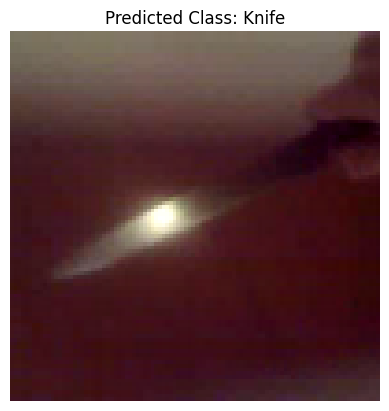

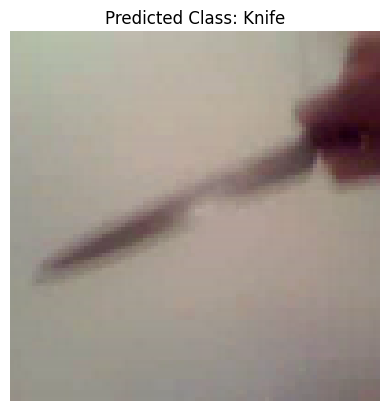

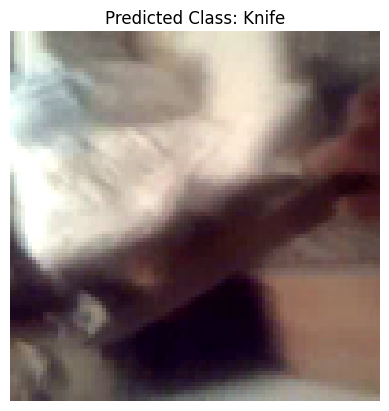

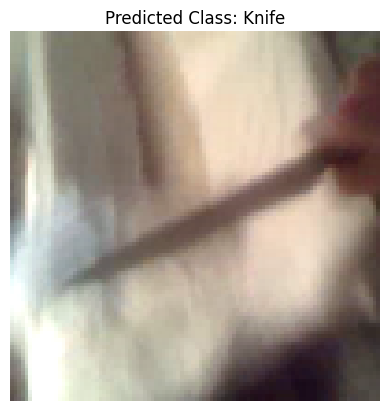

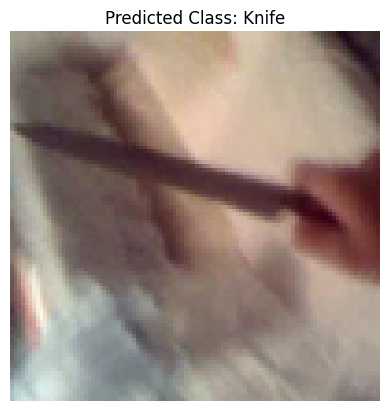

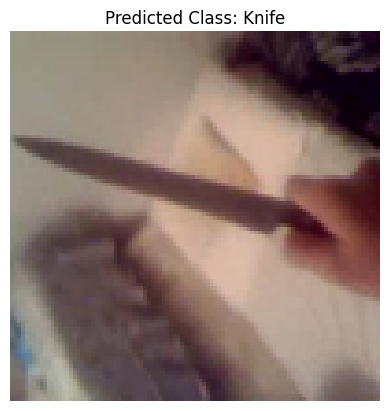

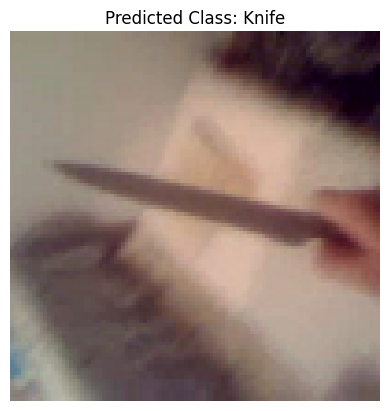

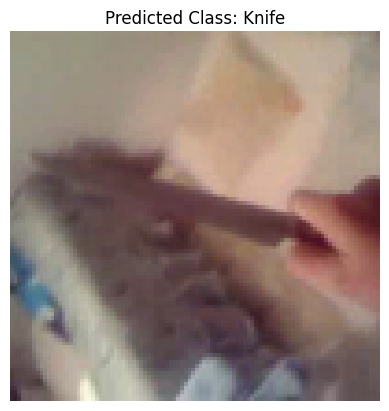

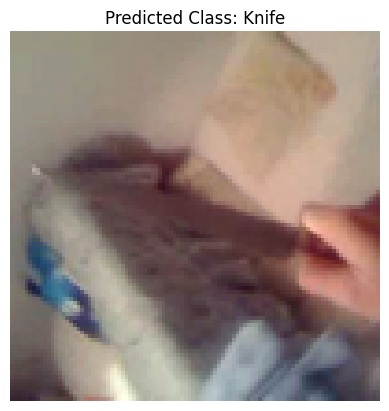

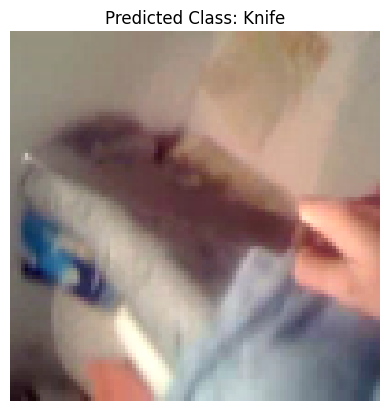

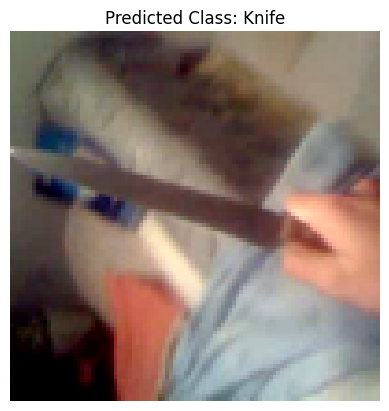

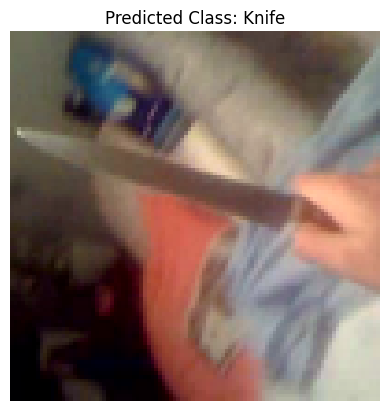

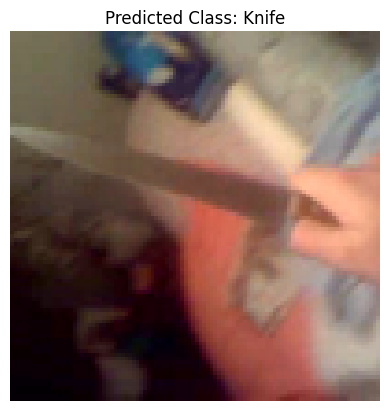

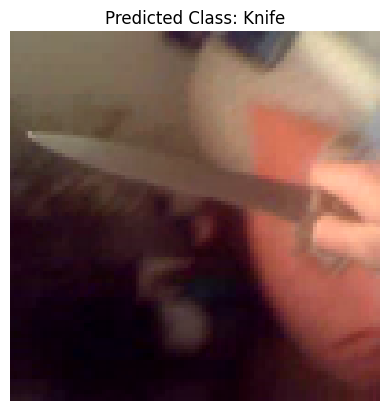

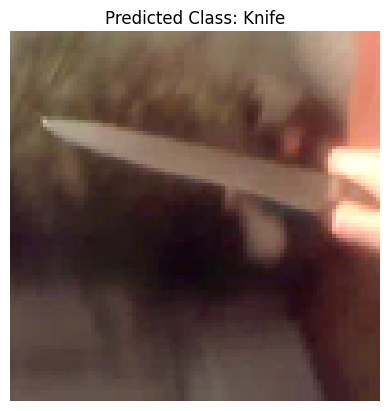

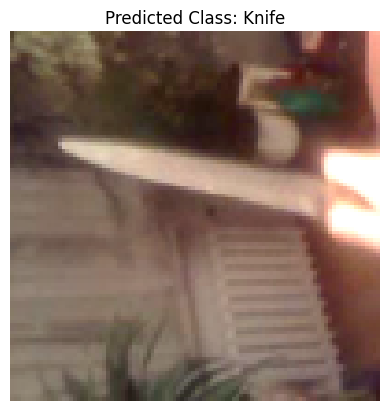

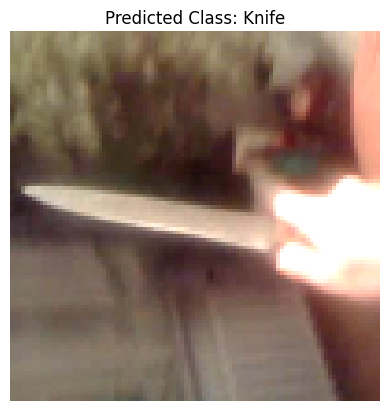

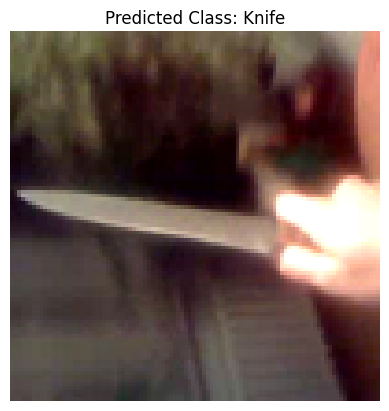

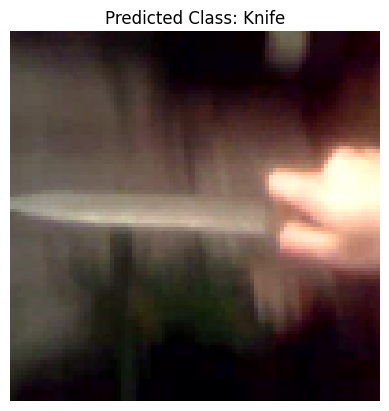

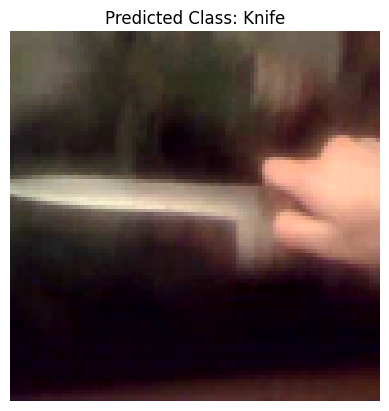

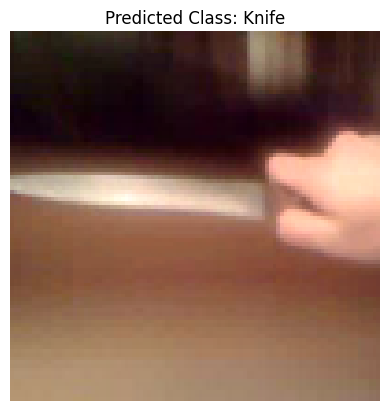

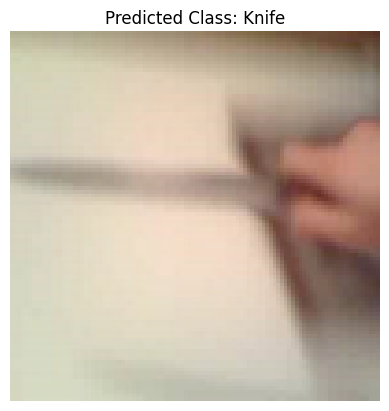

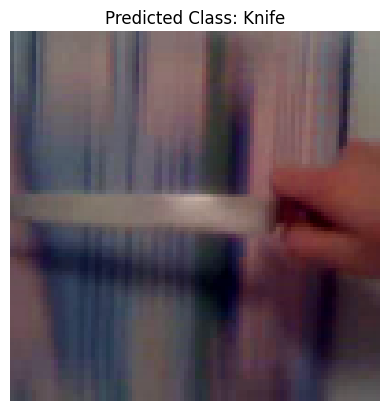

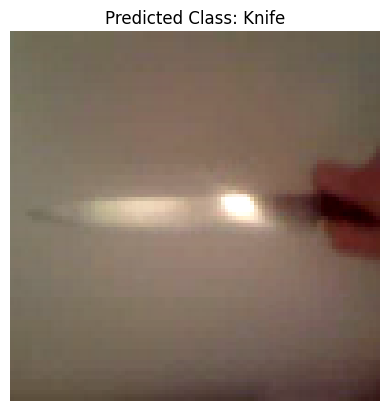

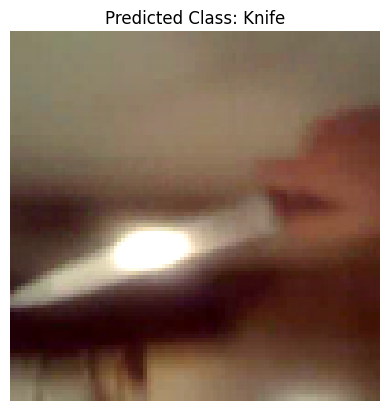

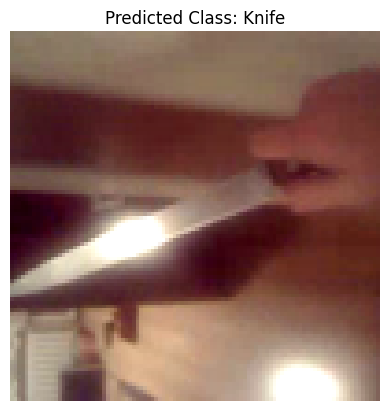

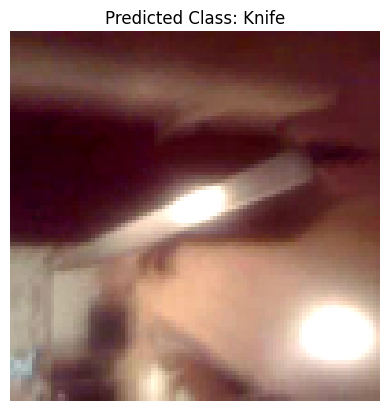

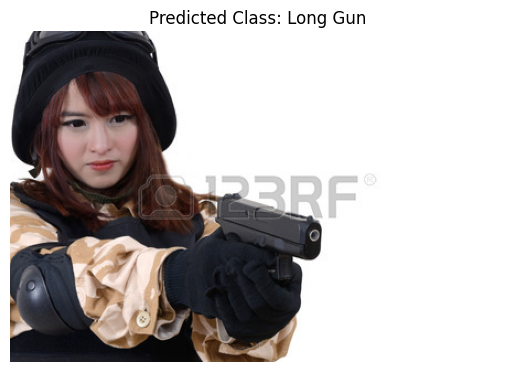

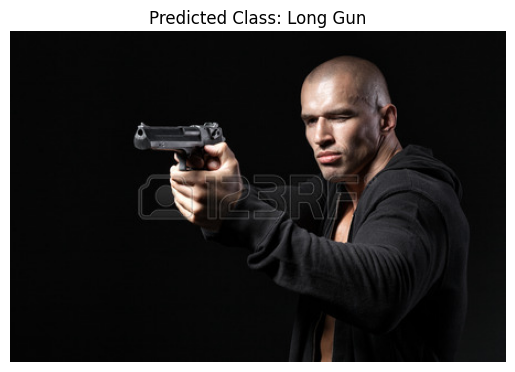

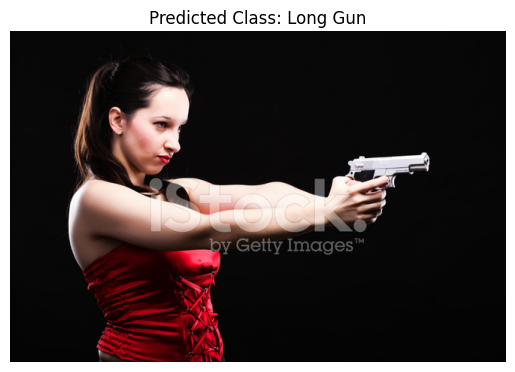

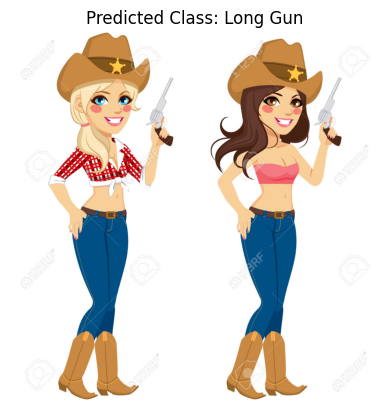

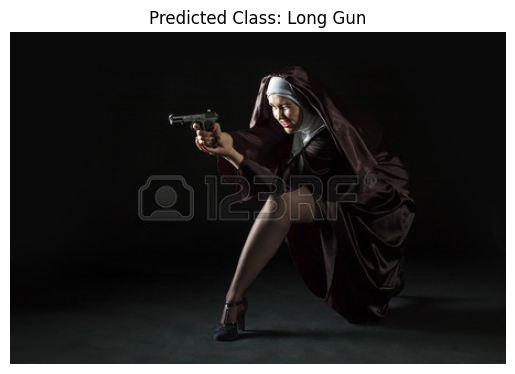

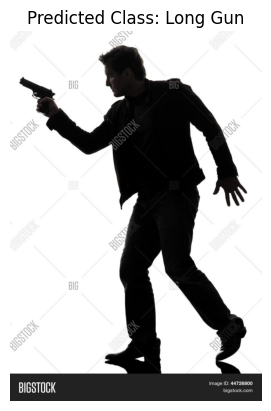

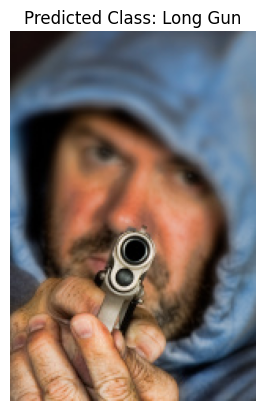

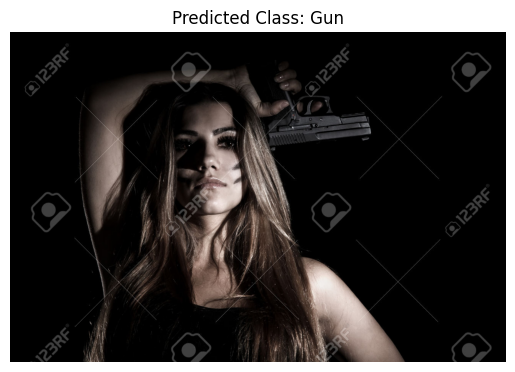

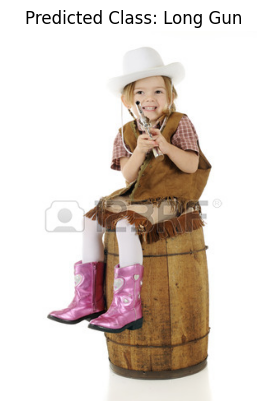

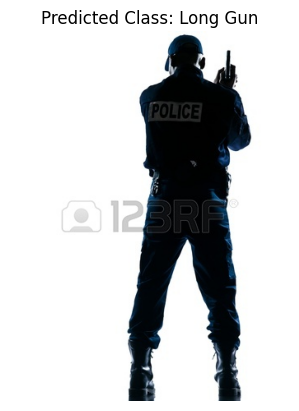

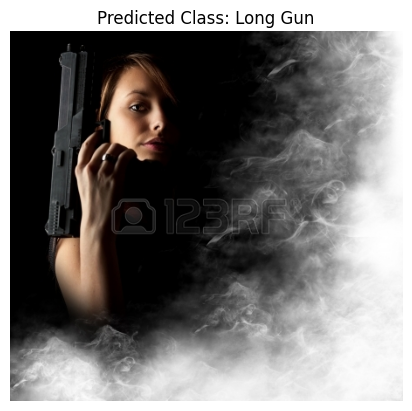

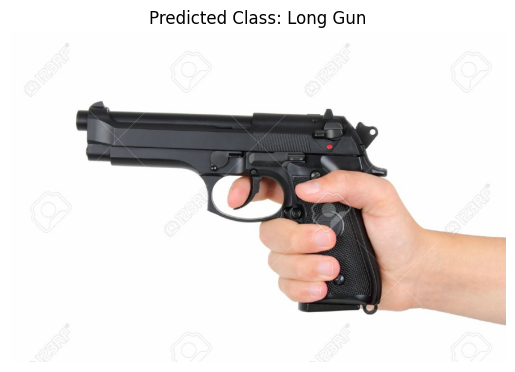

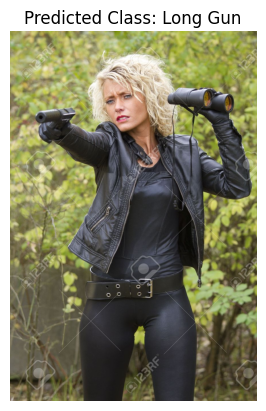

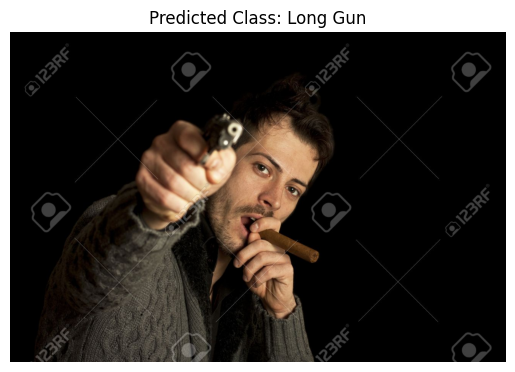

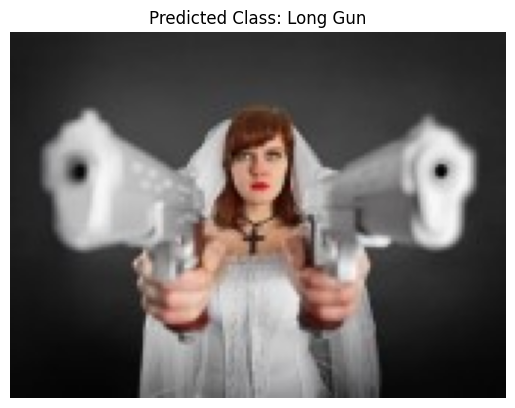

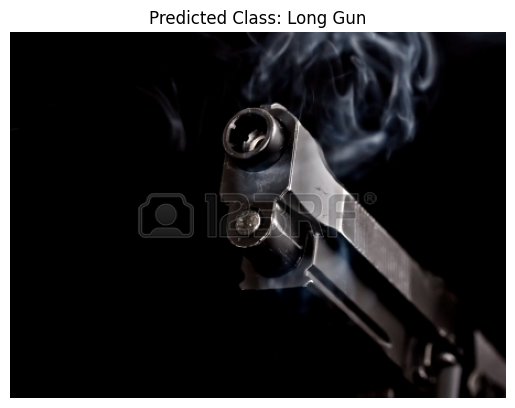

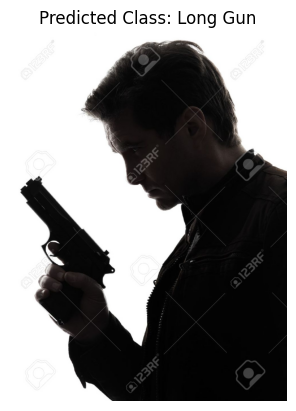

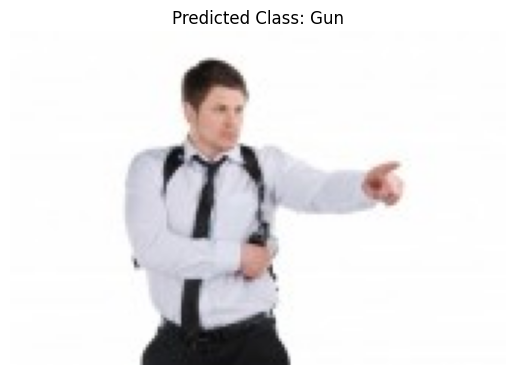

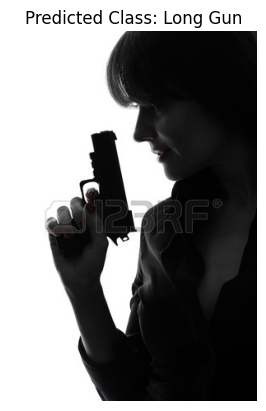

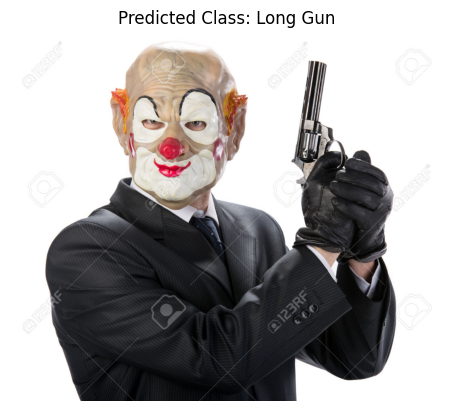

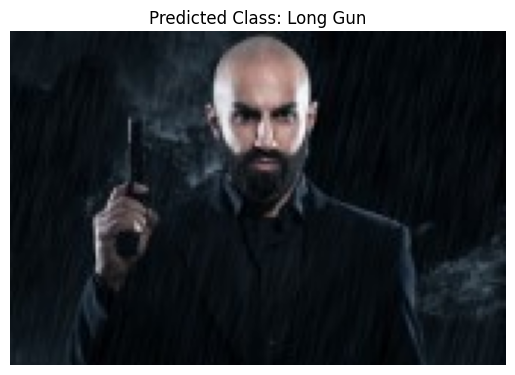

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

x = []
m, n = 240, 240

model = load_model("model_new_trial.h5")
path = 'Test2/'

files = os.listdir(path)

for i in files:
    im = Image.open(os.path.join(path, i))
    im = im.resize((m, n))
    im = im.convert('RGB')
    im_array = img_to_array(im) / 255
    x.append(im_array)

x = np.array(x)
x = np.transpose(x, (0, 3, 1, 2))
predictions = model.predict(x)

print(predictions)

class_names = ["Knife", "Gun", "Long Gun"]

for i in range(len(files)):
    im = Image.open(os.path.join(path, files[i]))
    plt.imshow(im)
    plt.axis('off')
    predicted_class = np.argmax(predictions[i])
    plt.title(f"Predicted Class: {class_names[predicted_class]}")
    plt.xlabel(f"Predicted Value: {np.max(predictions[i])}")  # Display the predicted value as xlabel
    plt.show()


## Classification using webcam

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# Load the pre-trained model
model = load_model("model_new_trial.h5")

class_names = ["Knife", "Gun", "Long Gun"]

# Function to preprocess the frame and make predictions
def process_frame(frame):
    m, n = 240, 240
    im = Image.fromarray(frame)
    im = im.resize((m, n))
    im = im.convert('RGB')
    im_array = img_to_array(im) / 255
    x = np.expand_dims(im_array, axis=0)
    x = np.transpose(x, (0, 3, 1, 2))
    predictions = model.predict(x)
    return predictions

# Access the camera
cap = cv2.VideoCapture(0)  # Use 0 for the default camera

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Make predictions for the frame
    predictions = process_frame(frame)
    
    # Get the predicted class and value
    predicted_class = np.argmax(predictions[0])
    predicted_value = np.max(predictions[0])

    # Display predicted class on console if value is above 8.50
    if predicted_value > 8.50:
        weapon_detected = class_names[predicted_class]
        print(f"Weapon detected: {weapon_detected}")
    
    # Show the frame with prediction label
    cv2.putText(frame, f"Predicted: {class_names[predicted_class]} ({predicted_value:.2f})", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()
